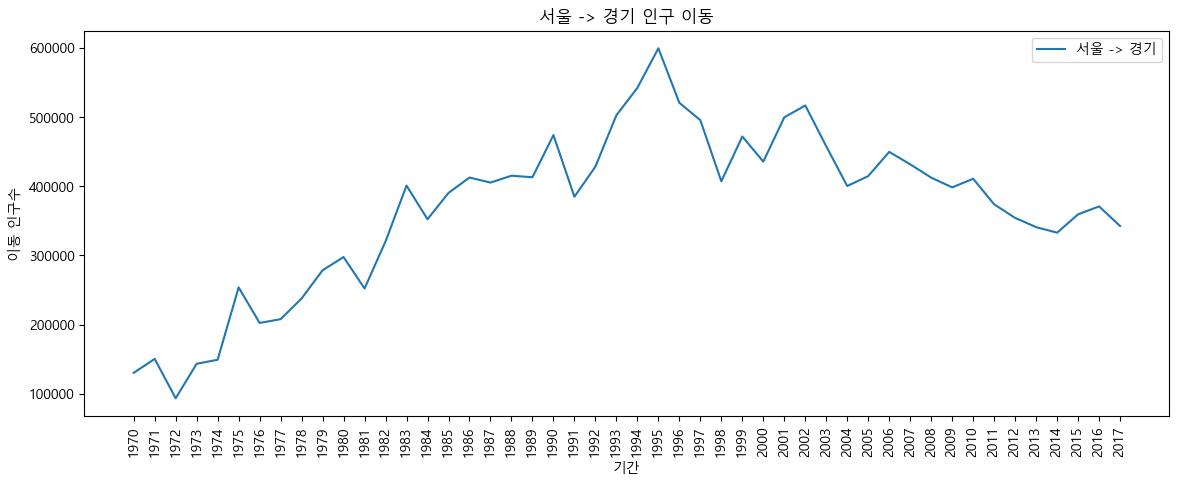

In [71]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

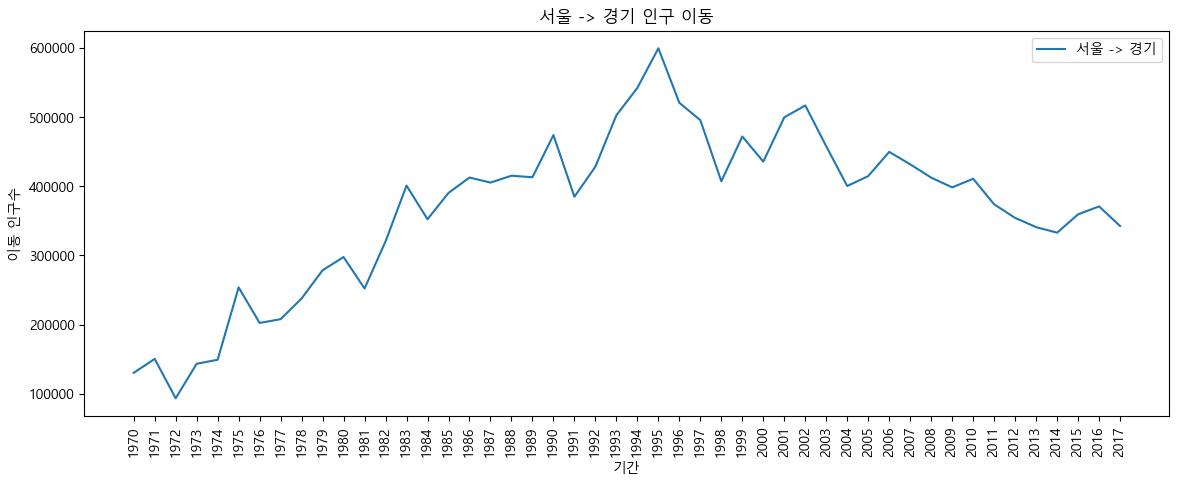

In [2]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# 경기 -> 서울
import pandas as pd
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df
#1. head() 대략적으로 데이터 확인
#2. 데이터정보확인 info() describe()
#3. 결측치 확인 여부
#  3.1 결측치 확인되면 drop fillna 선택

#=====================데이터 전처리과정=====================
#결측치 확인1
# #전출지 NaN이 전부 NaN 인지 중간에 다른게 있는지 확인이 필요
df.tail() # ==> 여기도 NaN이긴 했으나, 
df['전출지별'].value_counts() #counts 보니까 전국말고도 서울, 부산, 대구... 등이 있음.
# ==> 전출지별은 전부 NaN이 아니었다! 그럼 NaN을 채워야함. 셀병합으로 보임. 
df['전출지별']=df['전출지별'].ffill() #==> 위쪽 데이터값으로 채워짐.
#=======>결측치 대치, 문자열이고 병합된 컬럼의 정보가 na로 표기되어서 앞의 문자열로 대처
df['전출지별'].value_counts() #다시 확인



#결측치 확인2
# df.info()   # 출력물 중간에 ... 부분에 데이터가 누락된것이 있는지 확인 필요
df.isna().sum().values.sum() # np.int64(0) 전체 누락된 데이터가 없음을 확인
# df.describe()
# df.info() # Dtype 에서 object로 나옴 => object 변경 필요!
# pd.to_numeric(df.loc[1:, '1970']) #에러 :  Unable to parse string "-" : 숫자가 아닌 - 존재함을 확인할 수 있음.
pd.to_numeric(df.loc[1:, '1970'], errors='coerce') #-이 부분을 NaN으로 변경해서 나중에 결측치 삭제/변경 용이하게 변경
#=======> 문자형 숫자 -> 숫자로 변경하는데, 변경불가능한 데이터는 결측치로 대치

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [27]:
#경기에서 서울로
mask = (df['전출지별']  == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]
df2

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,경기도,서울특별시,95388,95423,90470,107177,107518,207641,144524,154021,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


In [78]:
df2.isna().sum().values.sum()  #np.int64(0) 결측치 없음을 확인
# df2.info() #Dtype object 확인
df2.T.index[2:]  #전부 연도로만 된것을 확인
df3 = df2.iloc [:, 2:] #df2.loc[:, '1970':] 동일

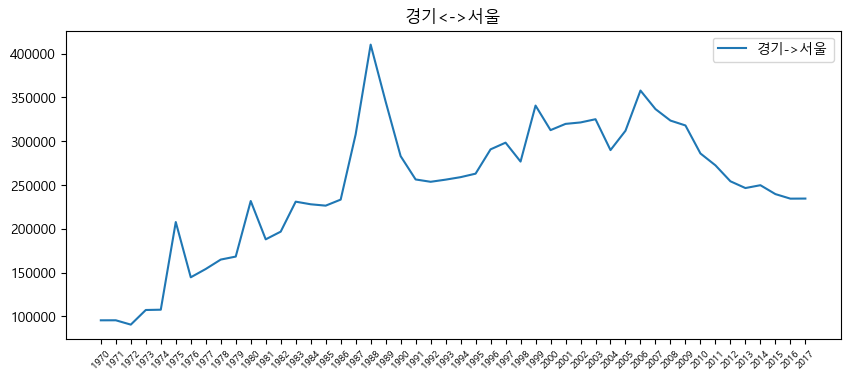

In [80]:
import matplotlib.pyplot as plt
df3.values.shape  #(1,47) 로 2차원..
df3.values.flatten() #1차원으로 펼쳐짐..? (1,1,48) [[[~~]]] ==> flatten하면 한번에 1차원으로 변경
plt.figure(figsize=(10,4))
plt.xticks(rotation=45, fontsize=7)
plt.plot(df3.columns, df3.values.flatten())
plt.title('경기<->서울')
plt.legend(labels = ['경기->서울'], loc='best') #범례labels = ['경기->서울'] / 범례위치 loc='center', upper 등 가능
plt.show()

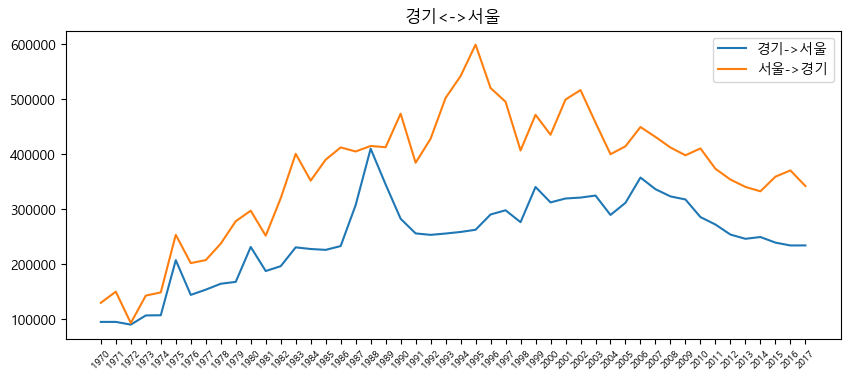

In [81]:
import matplotlib.pyplot as plt
df3.values.shape  
df3.values.flatten() 
plt.figure(figsize=(10,4))
plt.title('경기<->서울')


plt.plot(df3.columns, df3.values.flatten(), label = '경기->서울')  #경기 ->서울
plt.plot(sr_one.index, sr_one.values, label = '서울->경기')  #서울-> 경기 첫셀 데이터 추가

plt.legend(loc='best') #라벨 헷갈리니까 상기 plot에 기재하고 legend는 따로 입력할것
# plt.legend(labels = ['경기->서울', '서울->경기'], loc='best') 

plt.xticks(rotation=45, fontsize=7)
plt.show()

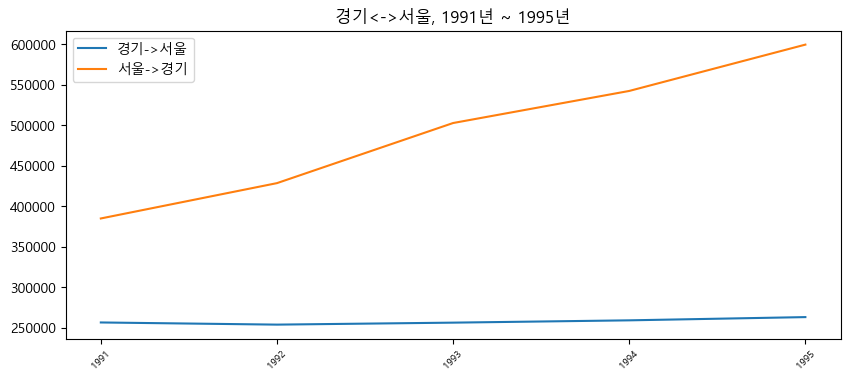

       1991    1992    1993    1994    1995
164  256270  253605  256049  258897  262893
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
Name: 경기도, dtype: object
===
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [109]:
# 1991 ~ 1995년까지 데이터를 추출해서 GPT를 통해 인구 이동에 대한 추론
df4 = df2.loc[:, '1991':'1995']
df4
sr2 = sr_one.loc['1991':'1995']


import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.title('경기<->서울, 1991년 ~ 1995년')


plt.plot(df4.columns, df4.values.flatten(), label = '경기->서울')  #경기 ->서울
plt.plot(sr2.index, sr2.values, label = '서울->경기')  #서울-> 경기 첫셀 데이터 추가

plt.legend(loc='best') #라벨 헷갈리니까 상기 plot에 기재하고 legend는 따로 입력할것
# plt.legend(labels = ['경기->서울', '서울->경기'], loc='best') 

plt.xticks(rotation=45, fontsize=7)
plt.show()

print (df4)
print ((sr2))
print('===')
print(type(df4), type(sr2))



### gpt에게 질문### 
너는 데이터 분석 전문가야
우리는 다음데이터를 통해서 실제 어떤 사건이 일어났는지 과저 정보를 조회해서 추론해줘

1. 경기에서 서울로 유입된 년도별 인구수
       1991    1992    1993    1994    1995
164  256270  253605  256049  258897  262893
2. 서울에서 경기로 유입된 년도별 인구수
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411

시각화로 확인했을 때 서울에서 경기도로 이동한 인구가 급격히 증가하는 패턴을 보이는데
해당 이유에 대해서 각종 자료를 검색해서 정확하게 정보를 찾아줘

==> 필요하면 그래프(차트) 그려달라고 요청하기 


핵심 원인 요약 (각 원인에 대한 근거 출처 첨부)

‘신도시(뉴타운)’ 대규모 공급 — Bundang, Ilsan, Pyeongchon, Sanbon 등

배경: 1980~90년대에 정부가 서울의 주택난을 해소하고 인구·산업의 과밀을 완화하기 위해 수도권 주변에 여러 단계의 ‘신도시(First-stage new towns)’를 계획·조성했습니다. 이들 신도시는 1990년대 초~중반에 입주가 본격화되어 서울에서 대규모 전입을 유도했습니다. 


예: 일산( Ilsan ) — 일산 신도시는 1992년 이후 급격히 인구·주거 기능을 갖추기 시작해 1990년대 중반에 인구 유입이 두드러졌습니다. (일산의 신도시 목적은 “서울의 주거난 완화”입니다.) 

정부의 주택공급·정책(예: ‘Two Million Home Construction Plan’ 등)과 탈(脫)서울화 정책

1980~90년대 주택정책·신도시 정책들은 서울 과밀 완화와 수도권 균형발전을 목표로 했고, 그 결과 중산층 이상의 가구들이 신도시(경기도)로 대거 이동했습니다. 여러 학술연구와 보고서가 1990년대 신도시가 서울의 인구분산에 결정적 역할을 했다고 분석합니다. 

**교통망·연계성 개선** — 수도권 전철 연장, 고속화 도로 등으로 출퇴근·생활권 확장
신도시들은 철도(지하철 연장·신규 노선) 및 도로 인프라가 같이 계획되어 서울과의 통근·교류가 현실적으로 가능해졌습니다. 출퇴근 가능권(통근권)이 넓어지면서 주거지는 경기, 일터는 서울(또는 경기 내 지역)로 분화하는 패턴이 강화되었습니다. 


**경기도 내 상업·산업·일자리 확충(산업의 외곽 이전 및 분산)**
일부 산업·사무기능이 수도권 외곽·경기 지역으로 분산되면서 경기 자체가 일자리·서비스 거점으로 성장했고, 이에 따른 인구유입도 발생했습니다(산업의 ‘suburbanization’). 


**도시계획·정책의 시간적 일치(1991~1995) — 데이터의 급증과 시기 일치**

제공하신 데이터(서울→경기 유입 증가: 1991→1995 급증)는 위 신도시들의 ‘입주·성숙’ 시기(초·중반 1990s)와 시기적으로 맞물립니다. 예: 일산은 1992년경부터 본격 성장, Bundang 등도 1990년대 초중반에 계획·입주가 집중됨. 따라서 통계상의 ‘서울에서 경기로의 전출 증가’와 직접 연결될 가능성이 큽니다. 


데이터와 원인 연결(해석 가이드)
귀하가 보여주신 숫자(서울→경기 유입 급증)는 **신도시 입주 시점(early–mid 1990s)**과 시계열적으로 일치합니다.

해석 예시:
1991~1995 사이 경기 쪽 신규 주택(신도시) 입주가 늘어나 중산층 가구의 이주가 늘었고, 동시에 교통망 개선으로 서울 근무자들의 경기 지역으로의 주거 이전이 촉진되었습니다.

즉, 단순히 “사람들이 경기로 가는” 현상이 아니라 **정책(주택공급+인프라)+시장(주거수요)+산업(일자리 변화)**이 합쳐진 구조적 이동입니다.

추천하는 추가 검증(제가 직접 더 찾아드릴 수 있음)
원인 결론을 더 촘촘히 입증하려면 다음 자료들을 추가 수집해 비교해볼 것을 권합니다(원하시면 제가 바로 찾아서 요약해 드릴게요):
- 통계청(또는 서울시·경기도) 연도별 행정구역 간 전출입 통계(1990~1996) — 연도별 이동자 구성(연령·직업·주택소유 여부) 확인.
- 신도시별 입주(준공) 시기와 인구증가 시계열 자료(Bundang, Ilsan, Pyeongchon, Sanbon, Joongdong 등).
- 교통/전철 노선 연장·개통 연도(해당 노선이 개통된 해와 전후 이동 패턴 비교).
- 당시(1990s 초중반) 정부 주택정책·보도자료(예: 2백만호 계획 등).

핵심 출처(이 답변에서 가장 중요하게 쓴 자료)
- 신도시가 1990년대 중·후반까지 수도권 분산에 결정적 역할을 했다는 연구·보고. 
- 일산(ILSAN) 신도시의 성장 및 1992년대 이후 급증 기록(백그라운드). 
- KRIHS / 국가·국제 보고서: 신도시 개발 역사와 목적(서울의 주택난 완화). 
- World Bank / 도시발전 관련 요약(1990s의 도시화 패턴 변화와 정부정책). 

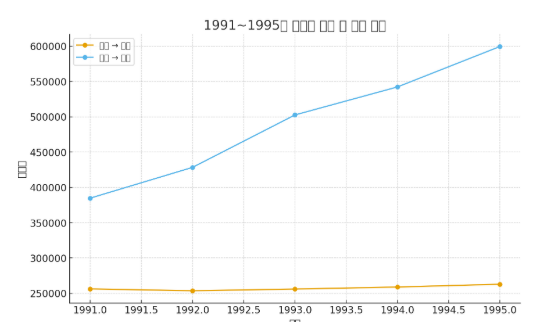

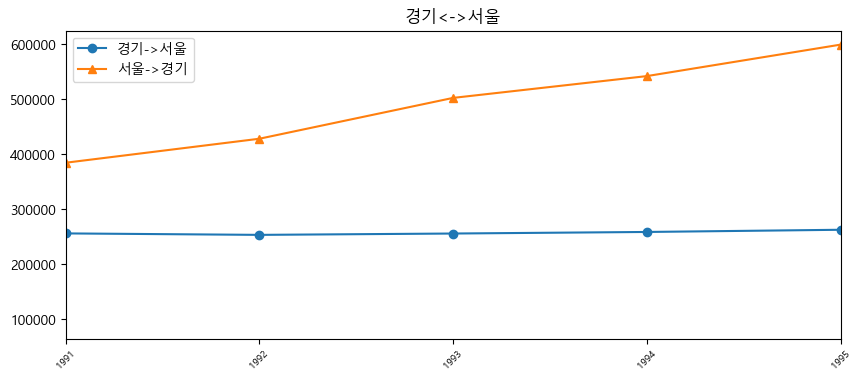

In [ ]:
#그래프는, 기존데이터에서 x축 지정해서 할 수 있음.
# plt.xlim('1991', '1995') ===> 기존데이터에서 X축 지정해서 할수 있음!!!!!!

import matplotlib.pyplot as plt
df3.values.shape  
df3.values.flatten() 
plt.figure(figsize=(10,4))
plt.title('경기<->서울')


plt.plot(df3.columns, df3.values.flatten(), label = '경기->서울', marker ='o')  #marker 지정
plt.plot(sr_one.index, sr_one.values, label = '서울->경기', marker='^')  #marker 지정 
#marker 가능 : *, o, ^

plt.legend(loc='best') 
plt.xlim('1991', '1995')  ############==================> 기존데이터에서 X축 지정해서 할수 있음!!!!!!
plt.xticks(rotation=45, fontsize=7)
plt.show()
